In [4]:
# %matplotlib inline
%matplotlib notebook

# import mpld3
# mpld3.enable_notebook()
import rosbag_pandas
import pandas as pd
import matplotlib.pyplot as plt
import easygui
import rosbag
import json
import numpy as np
import cPickle as pkl
import time
import seaborn as sns
import datetime as dt
import fnmatch
import os
import bokeh.palettes as bp

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)
    
def pickler( obj, path):
    """
    Pickle a Python object
    """
    with open(path, "wb") as pfile:
        pkl.dump(obj, pfile)

def depickler( path):
    """
    Extracts a pickled Python object and returns it
    """
    with open(path, "rb") as pfile:
        data = pkl.load(pfile)
    return data
import os

def get_filepaths(directory):
    """
    This function will generate the file names in a directory 
    tree by walking the tree either top-down or bottom-up. For each 
    directory in the tree rooted at directory top (including top itself), 
    it yields a 3-tuple (dirpath, dirnames, filenames).
    """
    file_paths = []  # List which will store all of the full filepaths.

    # Walk the tree.
    for root, directories, files in os.walk(directory):
        for filename in files:
            # Join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)  # Add it to the list.

    return file_paths  # Self-explanatory.

# Run the above function and store its results in a variable.   
full_file_paths = get_filepaths("/Users/johnny/Desktop/TEST")

In [5]:
def bag2df(paths=None):
    '''
    Load  bag filesto make into respective dataframes
    '''
    # defaultPath="/media/rhagoletis/6db8b2b2-ebe2-4555-9b79-93b10ef9dec31/2017_03_31/"
    defaultPath="/home/rhagoletis/catkin/src/World/bags/"

    if paths is None:
        paths=easygui.fileopenbox(title="Bags to Dataframes"
                              ,default=defaultPath,
                              multiple=True,filetypes=["*traj.bag"])

    # paths =['/media/rhagoletis/NICE_Pavan_2B/2017_04_17/2017-04-17__23~05~43_apple34_00_odour_gain~8_speed~1.0_bout~30_DC~-0.128_traj.bag'] 
    print paths, "\n"
    metadata=None
    # t=time.now()
    i=1
    for path in paths:
        tic()
        print "starting analysis of file %s , %s / %s files" %(path.split('/')[-1],i,len(paths))
        try:
            df=rosbag_pandas.bag_to_dataframe(path,include=['/trajectory'])
        except Exception as e:
            print e, path
            
        bag=rosbag.Bag(path)

        try:
            for topic,msg,t in bag.read_messages(topics='/metadata'):
                a=msg
    #         parameters=json.loads(a.data)
    #         metadata={"meta":parameters}

            metadata=json.loads(a.data)

        except :
            print "no such file!, trying the pickle"
            try:
                metadata=depickler(paths[0].split('.bag')[0])
            except IOError:
                metadata=depickler(paths[0].split('.bag')[0]+'.pickle')

            parameters=metadata['parameters']


        obj=dict(df=df,metadata=metadata)

        picklepath=path+"_df.pickle"
        pickler(obj,picklepath)
    #     df.to_pickle(picklepath)

        i+=1
        toc()
    print "\nanalysis of %s files complete" %len(paths)
    # print (time.now()-t)

# bag2df()

In [6]:
def bagDir2df():
    
    foldPath= easygui.diropenbox(    default="/home/rhagoletis/catkin/src/World/bags/")
    matches = []
    for root, dirnames, filenames in os.walk(foldPath):
        for filename in fnmatch.filter(filenames, '*.bag'):
            matches.append(os.path.join(root, filename))
    matches
    bag2df(paths=matches)

bagDir2df()

['/home/rhagoletis/catkin/src/World/bags/2018_09_18/2018-09-18__14~05~34_apple107_00_odour_wind_gain~8_speed~0.5_bout~60_DC~0.189_full.bag', '/home/rhagoletis/catkin/src/World/bags/2018_09_18/2018-09-18__14~16~31_apple107_00_odour_wind_gain~8_speed~0.5_bout~60_DC~0.189_full.bag', '/home/rhagoletis/catkin/src/World/bags/2018_09_18/2018-09-18__13~49~28_apple107_00_odour_wind_gain~8_speed~0.5_bout~60_DC~0.189_traj.bag', '/home/rhagoletis/catkin/src/World/bags/2018_09_18/2018-09-18__13~49~28_apple107_00_odour_wind_gain~8_speed~0.5_bout~60_DC~0.189_full.bag', '/home/rhagoletis/catkin/src/World/bags/2018_09_18/2018-09-18__14~16~31_apple107_00_odour_wind_gain~8_speed~0.5_bout~60_DC~0.189_traj.bag', '/home/rhagoletis/catkin/src/World/bags/2018_09_18/2018-09-18__14~05~34_apple107_00_odour_wind_gain~8_speed~0.5_bout~60_DC~0.189_traj.bag'] 

starting analysis of file 2018-09-18__14~05~34_apple107_00_odour_wind_gain~8_speed~0.5_bout~60_DC~0.189_full.bag , 1 / 6 files
Elapsed time: 42.109509 second

In [ ]:
import rosbag_pandas


In [ ]:
pick=depickler(paths[0].split('.bag')[0])


In [ ]:
'''
Load  bag filesto make into respective dataframes
1726819
'''
defaultPath="/home/rhagoletis/catkin/src/beginner/scripts/panda/world/bags/"
paths=easygui.fileopenbox(title="Bags to Dataframes"
                          ,default=defaultPath,
                          multiple=True,filetypes=["*traj.bag"])
print paths, "\n"
metadata=None

i=1
for path in paths:
    tic()
    print "starting analysis of file %s , %s / %s files" %(path.split('/')[-1],i,len(paths))
    df=rosbag_pandas.bag_to_dataframe(path,include=['/trajectory'])
    bag=rosbag.Bag(path)
    
#     try:
#         for topic,msg,t in bag.read_messages(topics='/metadata'):
#             a=msg
# #         parameters=json.loads(a.data)
# #         metadata={"meta":parameters}
#         metadata=json.loads(a.data)

#     except :
#         print "no such file!"
            
#     obj=dict(df=df,metadata=metadata)
    
#     picklepath=path+"_df.pickle"
#     pickler(obj,picklepath)
# #     df.to_pickle(picklepath)
    
    i+=1
    toc()
print "\nanalysis of %s files complete" %len(paths)


In [59]:

def analyser(winTitle):
    
    '''
    takes window title input and returns average 
    compensation during stimulus period for each speed as a df
    '''
    #unknown rare bug, shabby fix
    df.trajectory__impose[0]=0
    
    impose=df.trajectory__impose.copy()
    impose[df.trajectory__impose==0]=1 #replace impose zero with one fordiv by zero
    compensation=df.trajectory__imposeResponse/impose
    df.trajectory__imposeResponseSmooth=pd.rolling_mean(df.trajectory__imposeResponse,window=165)
    compensationSmooth=df.trajectory__imposeResponseSmooth/impose

    cp = pd.DataFrame(index=compensation.index,columns=['a'])

    #flips are position where there is a rise or fall
    flips=np.sign(np.diff(df.trajectory__impose))

    #impose is impose df without first element
    impose=df.trajectory__impose.drop(df.trajectory__impose.index[0])

    #cw is clockWise, ccw is Counter clockwise
    #start and stop are positions where the impose starts or stops
    #start(stop) is zero everywhere except when there is the respective start(stop) event
    ccwStart=np.logical_and((flips==1) , (impose>0))
    ccwStop=np.logical_and((flips==-1) , (impose==0))
    cwStart=np.logical_and((flips==-1) , (impose<0))
    cwStop=np.logical_and((flips==1) , (impose==0))

#     plt.plot(np.array(impose),'r')
#     plt.plot(np.array(flips),'g')
#     plt.plot(np.array(ccwStart)*1,'b')
#     plt.plot(np.array(ccwStop)*1,'k')
#     plt.plot(np.array(cwStart)*1,'m')
#     plt.plot(np.array(cwStop)*1,'y')
#     print ccwStart.shape,ccwStop.shape
#     print cwStart.shape,cwStop.shape
#     plt.show()

    #(c)cwStart(stop)Index is just those positions where flips occured

    ccwStartIndex= ccwStart[ccwStart==1]
    cwStartIndex= cwStart[cwStart==1]
    ccwStopIndex= ccwStop[ccwStop==1]
    cwStopIndex= cwStop[cwStop==1]
#     print ccwStartIndex.shape,ccwStopIndex.shape
#     print cwStartIndex.shape,cwStopIndex.shape

#     print ccwStartIndex,ccwStopIndex
#     print cwStartIndex,cwStopIndex


    #compensationMean is a df who is zero when impose is false, 
    # and has mean value of compensation during the corresponding impose
    compensationMean = pd.DataFrame(index=compensation.index,columns=['mean']) #empty df with same index

    # print compensation
    def compMean(start,stop,compIn,compOut):
        consol=pd.DataFrame(columns=['fly','gain','impose','compensation'])


        print "calculating Mean"
        #if there are more starts than stop because of abrupt ending while recording
        #remove the last start event
        
        #remove the last events to remove noise
        start=start[:-1]
        stop=stop[:-1]

        try: 
            assert len(start)==len(stop)
        except AssertionError:
            print 'assertion error'
            start=start[:-1] 

        for i in range(len(stop)):
#             print "impose is",df.trajectory__impose[start.index[i]]
#             print "gain is",df.trajectory__gain[start.index[i]]


#             print "i mean is",compIn.ix[start.index[i]:stop.index[i]].mean()
            currCompensationMean=compIn.ix[start.index[i]:stop.index[i]].mean()
            compOut.ix[start.index[i]:stop.index[i]]=currCompensationMean
            curr=pd.DataFrame([{'fly':parameters['fly'],
                                                 "gain":df.trajectory__gain[start.index[i]],
                                                 "impose":df.trajectory__impose[start.index[i]],
                                                 'compensation':currCompensationMean}])
            consol=consol.append(curr,ignore_index=True)        
        cols=['fly','gain','impose','compensation']
        consol=consol[cols]
#         print "total measn were",i+1
        return consol

    cw=compMean(cwStartIndex,cwStopIndex,compensation,cp)
    ccw=compMean(ccwStartIndex,ccwStopIndex,compensation,cp)
    
    
    
    plt.plot(df.trajectory__imposeResponseSmooth,c=(0,0,1,0.2),label='imposeResponseSmooth')
#     plt.plot(compensationSmooth,c=(1,0,0,0.6),label='compensationSmooth')
    plt.plot(df.trajectory__impose,label='impose')
    plt.plot(cp,'g',label='compensationMean')
    plt.axhline(y=1)
    plt.title(winTitle)
    plt.legend()
    plt.show()
    
    return ccw, cw


In [5]:

def analyser2(winTitle):
    
    '''
    takes window title input and returns average 
    compensation during stimulus period for each speed as a df
    '''
    #unknown rare bug, shabby fix
    df.trajectory__impose[0]=0
    
    impose=df.trajectory__impose.copy()
    impose[df.trajectory__impose==0]=1 #replace impose zero with one fordiv by zero
    imposeSign=np.sign(impose)
#     imposeSign[imposeSign==0]=1
#     compensation=(df.trajectory__imposeResponse-df.trajectory__impose)#*imposeSign
#     compensation=(df.trajectory__imposeResponse-df.trajectory__impose)*imposeSign/abs(impose)
    compensation=(df.trajectory__impose-df.trajectory__imposeResponse)


    
#     df.trajectory__imposeResponseSmooth=pd.rolling_mean(df.trajectory__imposeResponse,window=10)

    df.trajectory__imposeResponseSmooth=df.trajectory__imposeResponse.rolling(10).mean()
    compensationSmooth=df.trajectory__impose-df.trajectory__imposeResponseSmooth

    cp = pd.DataFrame(index=compensation.index,columns=['a'])

    #flips are position where there is a rise or fall
    flips=np.sign(np.diff(df.trajectory__impose))

    #impose is impose df without first element
    impose=df.trajectory__impose.drop(df.trajectory__impose.index[0])

    #cw is clockWise, ccw is Counter clockwise
    #start and stop are positions where the impose starts or stops
    #start(stop) is zero everywhere except when there is the respective start(stop) event
    ccwStart=np.logical_and((flips==1) , (impose>0))
    ccwStop=np.logical_and((flips==-1) , (impose==0))
    cwStart=np.logical_and((flips==-1) , (impose<0))
    cwStop=np.logical_and((flips==1) , (impose==0))

#     plt.plot(np.array(impose),'r')
#     plt.plot(np.array(flips),'g')
#     plt.plot(np.array(ccwStart)*1,'b')
#     plt.plot(np.array(ccwStop)*1,'k')
#     plt.plot(np.array(cwStart)*1,'m')
#     plt.plot(np.array(cwStop)*1,'y')
#     print ccwStart.shape,ccwStop.shape
#     print cwStart.shape,cwStop.shape
#     plt.show()

    #(c)cwStart(stop)Index is just those positions where flips occured

    ccwStartIndex= ccwStart[ccwStart==1]
    cwStartIndex= cwStart[cwStart==1]
    ccwStopIndex= ccwStop[ccwStop==1]
    cwStopIndex= cwStop[cwStop==1]
#     print ccwStartIndex.shape,ccwStopIndex.shape
#     print cwStartIndex.shape,cwStopIndex.shape

#     print ccwStartIndex,ccwStopIndex
#     print cwStartIndex,cwStopIndex


    #compensationMean is a df who is zero when impose is false, 
    # and has mean value of compensation during the corresponding impose
    compensationMean = pd.DataFrame(index=compensation.index,columns=['mean']) #empty df with same index

    # print compensation
    def compMean(start,stop,compIn,compOut):
        consol=pd.DataFrame(columns=['fly','gain','impose','compensation','error'])


#         print "calculating Mean"
        #if there are more starts than stop because of abrupt ending while recording
        #remove the last start event
        
        #remove the last events to remove noise
        start=start[:-1]
        stop=stop[:-1]

        try: 
            assert len(start)==len(stop)
        except AssertionError:
#             print 'assertion error'
            start=start[:-1] 

        for i in range(len(stop)):
#             print "impose is",df.trajectory__impose[start.index[i]]
#             print "gain is",df.trajectory__gain[start.index[i]]


#             print "i mean is",compIn.ix[start.index[i]:stop.index[i]].mean()
            currCompensationMean=compIn.ix[start.index[i]:stop.index[i]].mean()
            currErrorMean=compIn.ix[start.index[i]:stop.index[i]].std()
        
            compOut.ix[start.index[i]:stop.index[i]]=currCompensationMean
            curr=pd.DataFrame([{'fly':parameters['fly'],
                                                 "gain":df.trajectory__gain[start.index[i]],
                                                 "impose":df.trajectory__impose[start.index[i]],
                                                 'compensation':currCompensationMean,"error":currErrorMean}])
            consol=consol.append(curr,ignore_index=True)        
        cols=['fly','gain','impose','compensation','error']
        consol=consol[cols]
#         print "total measn were",i+1
        return consol

    cw=compMean(cwStartIndex,cwStopIndex,compensation,cp)
    ccw=compMean(ccwStartIndex,ccwStopIndex,compensation,cp)
    
    
#     plt.figure()
#     plt.plot(df.trajectory__imposeResponseSmooth,c=(0,0,0.7,0.3),lw=2,label='imposeResponseSmooth')
# #     plt.plot(df.trajectory__imposeResponse,c=(0,0,1,0.2),label='imposeResponse')
#     plt.plot(compensationSmooth,c=(1,0,0,0.5),lw=1,label='compensationSmooth')
# #     plt.plot(compensation,c=(1,0,0,0.6),label='compensation')

#     plt.plot(df.trajectory__impose,label='impose')
#     plt.plot(cp,'g',label='compensationMean',lw=2,alpha=1)
# #     plt.axhline(y=1)
#     plt.title(winTitle)
#     plt.legend()
#     plt.show()
    
    return ccw, cw


In [61]:
fullConsol=pd.DataFrame()
ccw,cw=analyser2(Wtitle)
fullConsol=fullConsol.append(ccw,ignore_index=True)
fullConsol=fullConsol.append(cw,ignore_index=True)
# fullConsol

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:94: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:95: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:97: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based ind

In [10]:
'''Load a dataframe from pickle and analyse impose compensation'''
defaultPath="/home/rhagoletis/catkin/src/beginner/scripts/panda/world/bags/"
# paths=easygui.fileopenbox(title="Bags to Dataframes"
#                           ,default=defaultPath,
#                           multiple=True,filetypes=["*df.pickle"])


#9
# paths=['/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly9/2016-08-22__23:19:50_fly9_quad_00_gain3.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly9/2016-08-22__23:23:09_fly9_quad_00_gain3.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly9/2016-08-22__23:30:22_fly9_quad_00_gain7_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly9/2016-08-22__23:42:47_fly9_quad_00_gain10.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly9/2016-08-22__23:48:06_fly9_quad_00_gain10.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly9/2016-08-22__23:52:33_fly9_quad_00_gain14_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly9/2016-08-23__00:39:29_fly9_quad_00_gain17.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly9/2016-08-23__00:45:55_fly9_quad_00_gain17.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly9/2016-08-23__00:52:59_fly9_quad_00_gain21_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly9/2016-08-23__01:06:04_fly9_quad_00_gain28_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly9/2016-08-23__01:09:39_fly9_quad_00_gain28_trial_1_traj.bag_df.pickle'] 

#11
paths=['/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly11/2016-08-24__20:45:50_fly11_quad_00_gain14_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly11/2016-08-24__21:32:11_fly11_quad_00_gain7_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly11/2016-08-24__21:41:07_fly11_quad_00_gain3.5_trial_1_traj.bag_df.pickle'] 

#12
# ['/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly12/2016-08-25__12:51:50_fly12_quad_00_gain3.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly12/2016-08-25__13:03:29_fly12_quad_00_gain7_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly12/2016-08-25__13:17:59_fly12_quad_00_gain14_trial_1_traj.bag_df.pickle'] 

#13
#['/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly13/2016-09-03__00:08:57_fly13_quad_00_gain3.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly13/2016-09-03__00:23:58_fly13_quad_00_gain7_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly13/2016-09-03__01:03:45_fly13_quad_00_gain10.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly13/2016-09-03__01:17:49_fly13_quad_00_gain14_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly13/2016-09-03__01:40:40_fly13_quad_00_gain17.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly13/2016-09-03__01:52:56_fly13_quad_00_gain21_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly13/2016-09-03__02:10:40_fly13_quad_00_gain28_trial_1_traj.bag_df.pickle'] 

#14
#['/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly14/2016-09-05__23:16:41_fly14_impose_quad_00_gain3.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly14/2016-09-05__23:32:19_fly14_impose_quad_00_gain7_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly14/2016-09-05__23:46:55_fly14_impose_quad_00_gain14_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly14/2016-09-05__23:57:39_fly14_impose_quad_00_gain10.5_trial_1_traj.bag_df.pickle'] 





# paths=['/home/rhagoletis/catkin/src/World/ipy_notebooks/impose/fly13/2016-09-03__00:08:57_fly13_quad_00_gain3.5_trial_1_traj.bag_df.pickle'] 
# paths=['/home/rhagoletis/catkin/src/World/ipy_notebooks/impose/fly13/2016-09-03__00:08:57_fly13_quad_00_gain3.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/ipy_notebooks/impose/fly13/2016-09-03__00:23:58_fly13_quad_00_gain7_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/ipy_notebooks/impose/fly13/2016-09-03__01:03:45_fly13_quad_00_gain10.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/ipy_notebooks/impose/fly13/2016-09-03__01:17:49_fly13_quad_00_gain14_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/ipy_notebooks/impose/fly13/2016-09-03__01:40:40_fly13_quad_00_gain17.5_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/ipy_notebooks/impose/fly13/2016-09-03__01:52:56_fly13_quad_00_gain21_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/World/ipy_notebooks/impose/fly13/2016-09-03__02:10:40_fly13_quad_00_gain28_trial_1_traj.bag_df.pickle']
# paths=['/home/rhagoletis/catkin/src/World/ipy_notebooks/impose/fly13/2016-09-03__00:08:57_fly13_quad_00_gain3.5_trial_1_traj.bag_df.pickle'] 
# paths=['/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly14/2016-09-04__23:37:01_fly14_impose_quad_00_gain7_trial_1_traj.bag_df.pickle'] 
fullConsol=pd.DataFrame()
print paths, "\n"
for path in paths:
    
    tic()
    print "\n\ncurrentl;y analysisnh",path
    # picklepath=path+"_df.pickle"
#     data=depickler(path)
    data=pd.read_pickle(path)
    df=data["df"]
#     parameters=data["metadata"]['meta']
    parameters=data["metadata"]['parameters']

    toc()

    Wtitle=path.split('/')[-1]
    print Wtitle
    
#     print "parameter keys are", parameters.keys()
    print "\nparameter keys length are", len(parameters.keys())

#     df.trajectory__imposeResponse.plot(title=path.split('/')[-1],label="impose response")
#     df.trajectory__impose.plot(title=path.split('/')[-1],label="impose")
#     df.trajectory__compensation.plot(title=path.split('/')[-1],label="impose")

#     plt.show()
    
    ccw,cw=analyser2(Wtitle)
    fullConsol=fullConsol.append(ccw,ignore_index=True)
    fullConsol=fullConsol.append(cw,ignore_index=True)

# fullConsol["compensation"]=-fullConsol["compensation"]

# print fullConsol

['/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly11/2016-08-24__20:45:50_fly11_quad_00_gain14_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly11/2016-08-24__21:32:11_fly11_quad_00_gain7_trial_1_traj.bag_df.pickle', '/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly11/2016-08-24__21:41:07_fly11_quad_00_gain3.5_trial_1_traj.bag_df.pickle'] 



currentl;y analysisnh /home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly11/2016-08-24__20:45:50_fly11_quad_00_gain14_trial_1_traj.bag_df.pickle
Elapsed time: 1.203320 seconds.

2016-08-24__20:45:50_fly11_quad_00_gain14_trial_1_traj.bag_df.pickle

parameter keys length are 106


currentl;y analysisnh /home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly11/2016-08-24__21:32:11_fly11_quad_00_gain7_trial_1_traj.bag_df.pickle


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:94: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:95: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:97: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based ind

Elapsed time: 1.122575 seconds.

2016-08-24__21:32:11_fly11_quad_00_gain7_trial_1_traj.bag_df.pickle

parameter keys length are 106


currentl;y analysisnh /home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/fly11/2016-08-24__21:41:07_fly11_quad_00_gain3.5_trial_1_traj.bag_df.pickle
Elapsed time: 1.126439 seconds.

2016-08-24__21:41:07_fly11_quad_00_gain3.5_trial_1_traj.bag_df.pickle

parameter keys length are 106


<IPython.core.display.Javascript object>


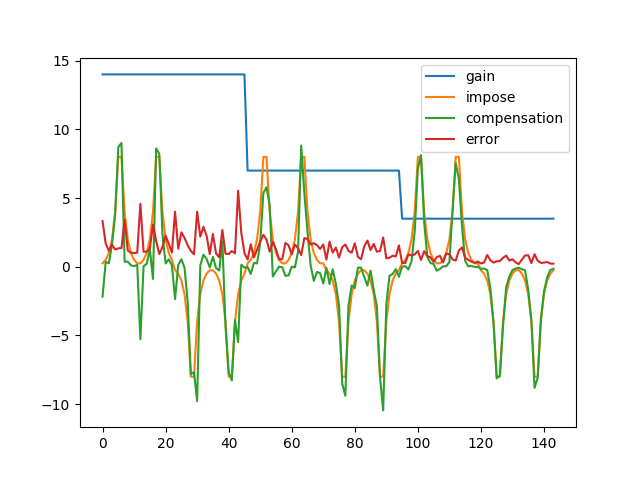

In [11]:
fullConsol.plot()

<IPython.core.display.Javascript object>


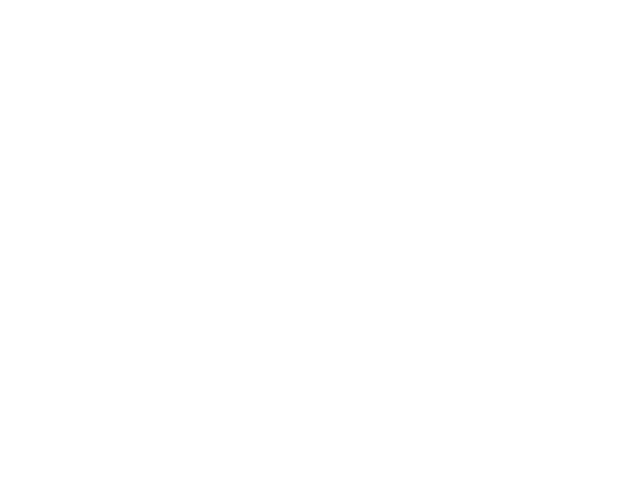

In [8]:
fullConsol.plot()

In [12]:
def consolidater():
#     path=easygui.filesavebox()
    path='/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/Untitled Folder/11'
    
    path+='_'+data['metadata']['parameters']['fly']+'_'+'consolidatedDF.pickle'

    print "save path is",path
    dataSet=dict(metadata=data['metadata'],fullConsol=fullConsol)
    pickler(dataSet,path)
consolidater()

save path is /home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/Untitled Folder/11_fly11_consolidatedDF.pickle


In [17]:
ds=pd.read_pickle('/home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/Consolidated/9_fly9_consolidatedDF.pickle')

In [18]:
ds['metadata']

{u'arduino': u"/*\n * ------------------------------\n *   MultipleSerialServoControl\n * ------------------------------\n *\n * Uses the Arduino Serial library\n *  (http://arduino.cc/en/Reference/Serial)\n * and the Arduino Servo library\n *  (http://arduino.cc/en/Reference/Servo)\n * to control multiple servos from a PC using a USB cable.\n *\n * Dependencies:\n *   Arduino 0017 or higher\n *     (http://www.arduino.cc/en/Main/Software)\n *   Python servo.py module\n *     (http://principialabs.com/arduino-python-4-axis-servo-control/)\n *\n * Created:  23 December 2009\n * Author:   Brian D. Wendt\n *   (http://principialabs.com/)\n * Version:  1.1\n * License:  GPLv3\n *   (http://www.fsf.org/licensing/)\n *\n */\n\n// Import the Arduino Servo library\n#include <Servo.h> \n\n// Create a Servo object for each servo\nServo servo1;\nServo servo2;\nServo servo3;\nServo servo4;\n// TO ADD SERVOS:\n//   Servo servo5;\n//   etc...\n\n//// Common servo setup values\n//int minPulse = 600; 

In [13]:
def unConsolidater(path=''):
    if path is "":
        path=easygui.fileopenbox()

    print "file path is",path
    
#     dataset=depickler(path)
    dataset=pd.read_pickle(path)
    return dataset["metadata"], dataset["fullConsol"]
met,fullConsol=unConsolidater('')

file path is /home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/Untitled Folder/9_fly9_consolidatedDF.pickle


In [28]:
fullConsol

,fly,gain,impose,compensation,error
0,fly9,3.5,0.25,0.122054,0.942745
1,fly9,3.5,0.50,0.237044,0.553865
2,fly9,3.5,1.00,0.316886,0.661896
3,fly9,3.5,2.00,1.121126,0.972257
4,fly9,3.5,4.00,3.022066,0.708550
5,fly9,3.5,8.00,7.022577,0.592410
6,fly9,3.5,8.00,6.560436,0.841719
7,fly9,3.5,4.00,2.690478,0.883528
8,fly9,3.5,2.00,0.858803,0.557096
9,fly9,3.5,1.00,1.227869,0.857432


In [14]:
paths =easygui.fileopenbox(multiple=True)
fullConsol=pd.DataFrame()
for path in paths:
    met,fc=unConsolidater(path)
    fc['fly']=path.split('/')[-1].split('_')[1]
    fullConsol=fullConsol.append(fc,ignore_index=True)
    print fc.shape
print "cOmplete"

# fullConsol["compensation"]=-fullConsol["compensation"]
fullConsol["compensation"]=abs(fullConsol["compensation"])
fullConsol["impose"]=abs(fullConsol["impose"])
fullConsol2=fullConsol[((abs(fullConsol["impose"])>2) &(abs(fullConsol["impose"])<7) &(abs(fullConsol["gain"])>3)  )]
d=fullConsol2.groupby(['fly','gain','impose']).mean()
d=d.reset_index()
# fullConsol2



file path is /home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/Untitled Folder/9_fly9_consolidatedDF.pickle
(399, 5)
file path is /home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/Untitled Folder/11_fly11_consolidatedDF.pickle
(144, 5)
file path is /home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/Untitled Folder/12_fly11_consolidatedDF.pickle
(169, 5)
file path is /home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/Untitled Folder/13_fly13_consolidatedDF.pickle
(553, 5)
file path is /home/rhagoletis/catkin/src/analyseWorld/ipy_notebooks/impose/Untitled Folder/14_fly14_consolidatedDF.pickle
(317, 5)
cOmplete


In [108]:
fullConsol.fly.unique()

array(['fly9', 'fly11', 'fly13', 'fly14'], dtype=object)

In [15]:
# fullConsol["compensation"]=-fullConsol["compensation"]
fullConsol["compensation"]=abs(fullConsol["compensation"])
fullConsol["impose"]=abs(fullConsol["impose"])
fullConsol2=fullConsol[((abs(fullConsol["impose"])>2) &(abs(fullConsol["impose"])<7) &(abs(fullConsol["gain"])>3)  )]
d=fullConsol2.groupby(['fly','gain','impose']).mean()
d=d.reset_index()
# fullConsol2



In [16]:
fullConsol2=fullConsol[((abs(fullConsol["impose"])>2) &(abs(fullConsol["impose"])<7) &(abs(fullConsol["gain"])>3)  )]
d=fullConsol2.groupby(['fly','gain','impose']).mean()
d=d.reset_index()
# fullConsol2

In [17]:
fullConsol.groupby(['fly','gain',]).mean()

impose  compensation     error
fly   gain                                  
fly11 3.5   2.553030      2.154295  0.476931
      7.0   2.586066      2.169974  0.945152
      14.0  2.728261      2.464029  1.610257
fly13 3.5   2.625000      1.982653  0.686682
      7.0   2.560811      1.854320  1.256053
      10.5  2.625000      1.973025  2.380358
      14.0  2.560811      1.931348  2.891989
      17.5  2.592466      2.330750  4.081551
      21.0  2.683761      2.157674  3.966747
      28.0  2.658451      2.329954  4.698332
fly14 3.5   2.600515      1.977356  0.662918
      7.0   2.698925      1.841551  1.088828
      10.5  2.576531      1.265461  1.662740
      14.0  2.467949      1.426823  1.887114
fly9  3.5   3.433333      3.236102  0.600000
      7.0   2.916667      2.414168  0.619327
      10.5  2.734694      2.377947  1.275001
      14.0  2.724638      2.216951  1.229082
      17.5  2.439655      1.446512  1.794494
      21.0  2.506579      1.578315  1.989650
      28.0  2.536667      1.796082  1.880382

In [11]:
%matplotlib notebook

In [19]:
d=fullConsol2.groupby(['fly','gain','impose']).mean()
d=d.reset_index()

In [76]:
def pubFigStyle():
    plt.rcParams['svg.fonttype'] = 'none'

    sns.set_style('ticks')
    sns.set_context("paper", rc={"font.size":5,"axes.titlesize":3,"axes.labelsize":7,'lines.linewidth' : 1,'lines.markersize' :1,
                                 'xtick.labelsize' : 6,'ytick.labelsize' : 6,'legend.fontsize':6,'legend.fancybox':False,
                                'legend.frameon':False})   


<IPython.core.display.Javascript object>


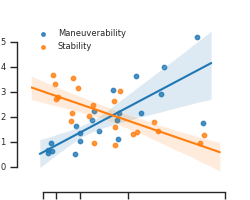

In [61]:
plt.figure(figsize=(2.5,2))
plt.rcParams['svg.fonttype'] = 'none'

sns.set_style('ticks')
sns.set_context("paper", rc={"font.size":5,"axes.titlesize":3,"axes.labelsize":7,'lines.linewidth' : 1,'lines.markersize' :1,
                             'xtick.labelsize' : 6,'ytick.labelsize' : 6,'legend.fontsize':6,'legend.fancybox':False,
                            'legend.frameon':False})   

ax=sns.regplot(x=d['gain'], y=d['error'],x_jitter=1,scatter_kws={"s": 10},label='Maneuverability');
ax=sns.regplot(x=d['gain'], y=d['compensation'],x_jitter=1,scatter_kws={"s": 10},label='Stability');


ax.legend(loc=(0,0.8),frameon=False,markerscale=0.8)
ax.set(xlabel='Gain (165*deg/rad/s)', ylabel='Stability and Maneuverability (rad/s)')#,title='Tradeoff between Stability and Maneuverability',)

# ax.set_xlabel('Gain (165*deg/rad/s)',fontsize=4)
# ax.set_ylabel('Gain (165*deg/rad/s)',fontsize=4)

plt.xticks([2,4,8,16,32])
sns.despine(offset=10,trim = True)

plt.savefig('gain_optima'+'_plt.svg',transparent=True,papertype='A4',frameon=False,)


In [62]:
d=pd.read_pickle('impose/fly11/2016-08-24__21:41:07_fly11_quad_00_gain3.5_trial_1_traj.bag_df.pickle')
df=d['df']
df=df.reset_index()
df.index=df.index/165.

<IPython.core.display.Javascript object>


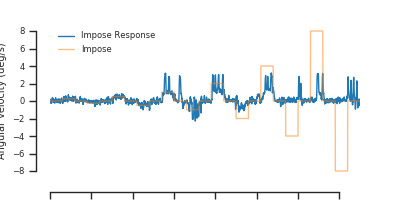

In [75]:
plt.figure(figsize=(4,2))
plt.plot(df.trajectory__imposeResponse.rolling(10).mean())
plt.plot(df.trajectory__impose,alpha=0.5)


plt.legend(['Impose Response','Impose'],frameon=False,markerscale=0.8)
plt.xlim(0,75)
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (deg/s)')
# plt.set(xlabel='Gain (165*deg/rad/s)', ylabel='Stability and Maneuverability (rad/s)',title='Tradeoff between Stability and Maneuverability',)
sns.despine(offset=10,trim = True)
plt.savefig('gain_sweep_raw'+'_plt.svg',transparent=True,papertype='A4',frameon=False,)


<IPython.core.display.Javascript object>


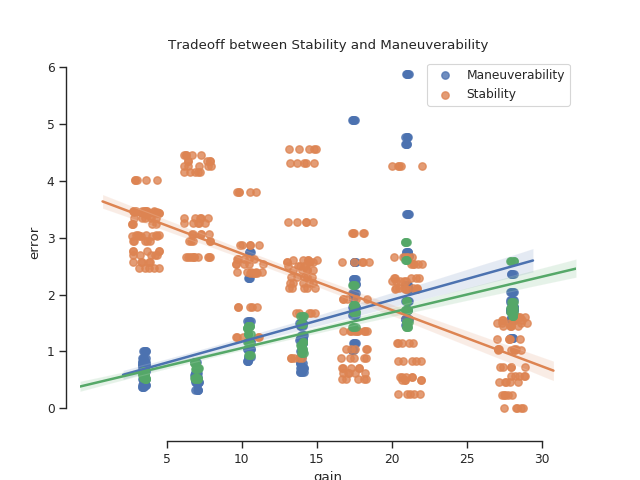

In [54]:
plt.figure()
ax=sns.regplot(x=fullConsol2['gain'], y=fullConsol2['error'],x_jitter=.15,scatter_kws={"s": 28},label='Maneuverability');
ax=sns.regplot(x=fullConsol2['gain'], y=fullConsol2['compensation'],x_jitter=1,scatter_kws={"s": 28},label='Stability',);
# ax=sns.regplot(x=fullConsol['gain'], y=fullConsol['compensation'],x_jitter=.15,scatter_kws={"s": 28},label='Stability');
# sns.set(font_scale=1.25)  # crazy big
sns.set_style('ticks')
sns.set_context('paper')
ax.legend()
ax.set(xlabel='Gain (165*deg/rad/s)', ylabel='Stability and Maneuverability (rad/s)',title='Tradeoff between Stability and Maneuverability',)
pth=path+"regplot.png"
# plt.savefig(pth, dpi=400)
sns.despine(offset=10,trim = True)
# sns.regplot(x=fullConsol['gain'], y=fullConsol['error'],x_jitter=.5);
# 
# sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In [ ]:
plt.show()

In [ ]:
pth

In [ ]:
#lm plot of 2 graphs with impose fits

ax1=sns.lmplot(x="gain", y="error",x_jitter=.25,scatter_kws={"s": 28},hue="impose",data=fullConsol)
ax1.set(xlabel='Gain (165*deg/rad/s)', ylabel='S.D. of impose respone (rad/s)',title='Effect of impose speed on Maneuverability',)
ax2=sns.lmplot(x="gain", y="compensation",x_jitter=.25,scatter_kws={"s": 28},hue="impose",data=fullConsol)
ax2.set(xlabel='Gain (165*deg/rad/s)', ylabel='Mean of impose respone (rad/s)',title='Effect of impose speed on Stability',)
plt.tight_layout()

In [ ]:
ax=sns.regplot(x="gain", y="compensation",data=fullConsol,x_jitter=.25,scatter_kws={"s": 28},label='Stability');
ax=sns.regplot(x="gain", y="error",data=fullConsol,x_jitter=.25,scatter_kws={"s": 28},label='Stability');
ax.set(xlabel='Gain (165*deg/rad/s)', ylabel='Stability and Maneuverability (rad/s)',title='Tradeoff between Stability and Maneuverability')


In [ ]:
import seaborn as sns
# sns.set_style("whitegrid")

<IPython.core.display.Javascript object>


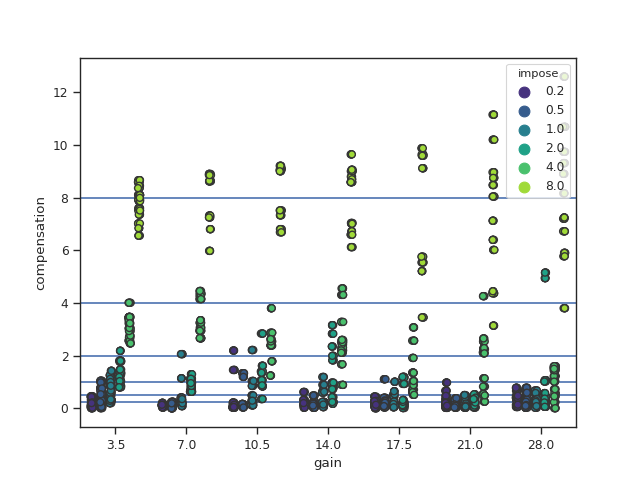

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


In [32]:
plt.figure()

# ax = sns.stripplot(hue=fullConsol['impose'].round(1).abs(),   jitter=0.092,
#                    y=(1-fullConsol['compensation']),x=fullConsol['gain'],
#                    split=True,palette="viridis",linewidth=1)
ax = sns.stripplot( jitter=0.092,hue=fullConsol['impose'].round(1).abs(),
                   y=(abs(fullConsol['compensation'])),x=fullConsol['gain'],
                   split=True,palette="viridis",linewidth=1)
for val in np.unique(abs(fullConsol["impose"])):
    plt.axhline(val)

plt.show()

<IPython.core.display.Javascript object>


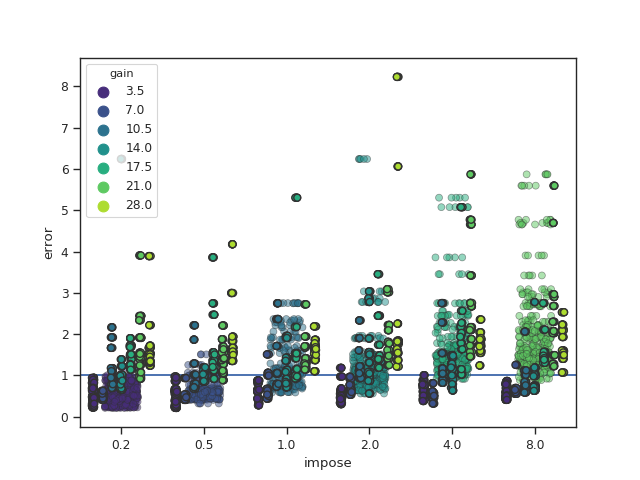

In [33]:
#yay, 
plt.figure()
#hue=fullConsol['impose'].round(1).abs(),  
ax = sns.stripplot( jitter=0.2,
                   y=fullConsol['error'],x=fullConsol['gain'],
                   split=True,palette="viridis",linewidth=.5,alpha=0.5)
plt.axhline(y=1)

plt.show()

<IPython.core.display.Javascript object>


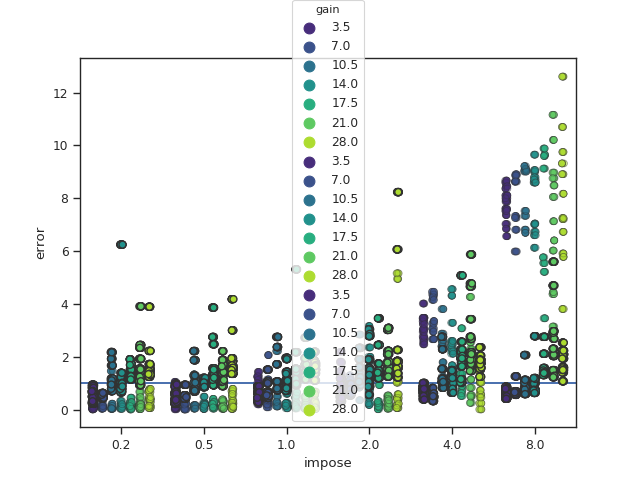

In [34]:
plt.figure()

ax = sns.stripplot(x=fullConsol['impose'].round(1).abs(),   jitter=True,
                   y=fullConsol['compensation'],hue=fullConsol['gain'],
                   split=True,palette="viridis",linewidth=0.5,alpha=0.5)
plt.axhline(y=1)

plt.show()

<IPython.core.display.Javascript object>


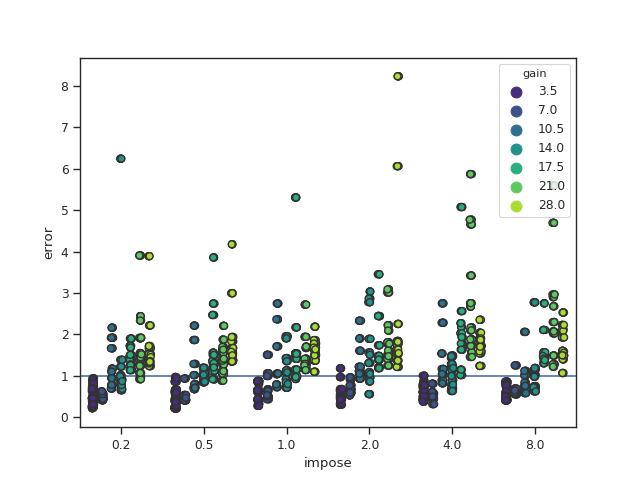

In [38]:
plt.figure()
ax = sns.stripplot(x=fullConsol['impose'].round(1).abs(),   jitter=True,
                   y=fullConsol['error'],hue=fullConsol['gain'],
                   split=True,palette="viridis",linewidth=1)
plt.axhline(y=1)

plt.show()

<IPython.core.display.Javascript object>


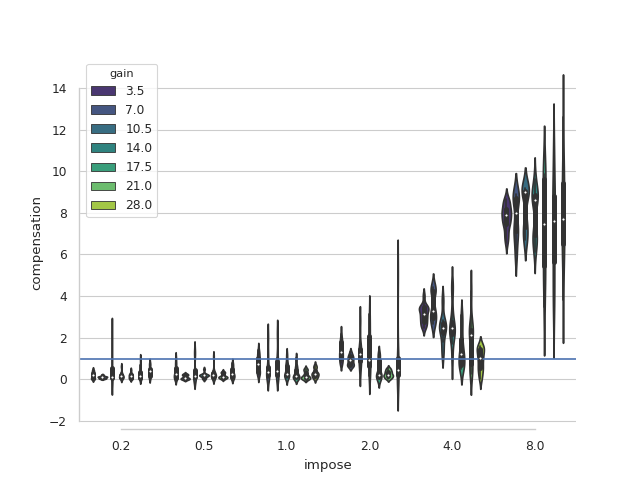

In [39]:
# sns.set(style="ticks")
plt.figure()

sns.set_style("whitegrid")
# Draw a nested boxplot to show bills by day and sex
sns.violinplot(x=fullConsol['impose'].round(1).abs() ,y=fullConsol["compensation"], 
            hue=fullConsol["gain"], palette="viridis")
# sns.stripplot(x=fullConsol['impose'].round(1).abs() ,y=fullConsol["compensation"], 
#             hue=fullConsol["gain"], palette="viridis")
plt.axhline(y=1)

sns.despine(offset=1, trim=True)
plt.show()

<IPython.core.display.Javascript object>


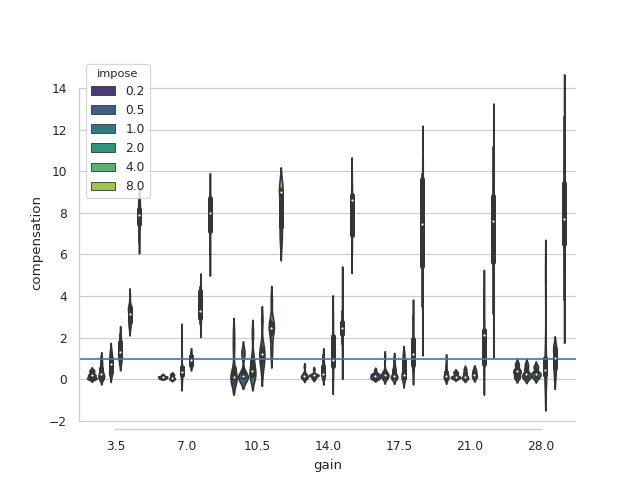

In [40]:
# sns.set(style="ticks")
plt.figure()

sns.set_style("whitegrid")
# Draw a nested boxplot to show bills by day and sex
sns.violinplot(hue=fullConsol['impose'].round(1).abs() ,y=fullConsol["compensation"], 
            x=fullConsol["gain"], palette="viridis")
# sns.stripplot(x=fullConsol['impose'].round(1).abs() ,y=fullConsol["compensation"], 
#             hue=fullConsol["gain"], palette="viridis")
plt.axhline(y=1)

sns.despine(offset=1, trim=True)
plt.show()

<IPython.core.display.Javascript object>


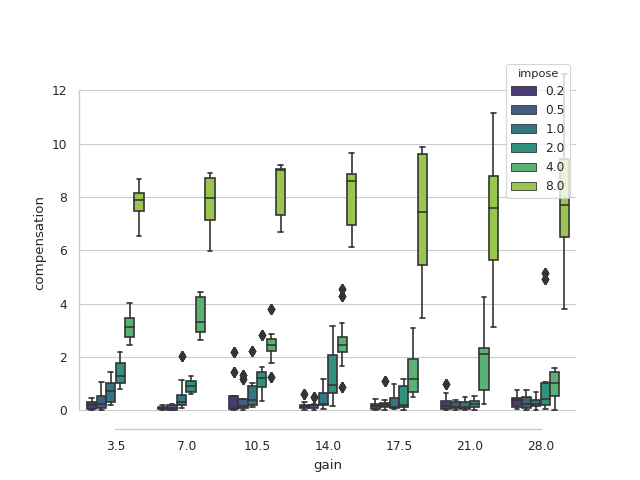

In [41]:
# sns.set(style="ticks")
plt.figure()

sns.set_style("whitegrid")
# Draw a nested boxplot to show bills by day and sex
sns.boxplot(hue=fullConsol['impose'].round(1).abs() ,y=fullConsol["compensation"], 
            x=fullConsol["gain"], palette="viridis")
# sns.stripplot(hue=fullConsol['impose'].round(1).abs() ,y=fullConsol["compensation"], 
#             x=fullConsol["gain"], palette="viridis_r",jitter=True,split=True)
# plt.axhline(y=1)

sns.despine(offset=1, trim=True)
plt.show()

<IPython.core.display.Javascript object>


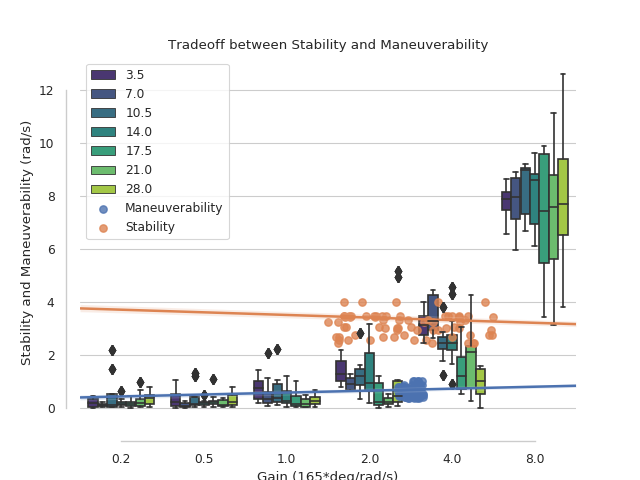

In [42]:
# sns.set(style="ticks")
plt.figure()

sns.set_style("whitegrid")
# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x=fullConsol['impose'].round(1).abs() ,y=fullConsol["compensation"], 
            hue=fullConsol["gain"], palette="viridis")
# sns.stripplot(x=fullConsol['impose'].round(1).abs() ,y=fullConsol["compensation"], 
#             hue=fullConsol["gain"], palette="viridis_r",jitter=True,split=True)
# plt.axhline(y=1)

sns.despine(offset=1, trim=True)
plt.show()

In [ ]:
pickler(fullConsol,'consolidatedDF')

In [ ]:
a=depickler('consolidatedDF')

In [ ]:
a['impose']=a['impose'].abs()
b=a.groupby(['fly','gain','impose'],as_index=False).mean()

ax = sns.stripplot(hue=b['impose'].round(1).abs(),   jitter=False,
                   y=b['compensation'],x=b['gain'],split=False,palette="viridis_r",size=8)
plt.show()

In [ ]:
plt.plot(b['gain'],b['compensation'])
plt.show()

In [ ]:
b['gain']
b['compensation']

In [ ]:


'''
takes window title input and returns average 
compensation during stimulus period for each speed as a df
'''
#unknown rare bug, shabby fix
df.trajectory__impose[0]=0

impose=df.trajectory__impose.copy()
impose[df.trajectory__impose==0]=1 #replace impose zero with one fordiv by zero
# compensation=df.trajectory__imposeResponse/impose
compensation=
compensationSmooth=df.trajectory__imposeResponseSmooth/impose

cp = pd.DataFrame(index=compensation.index,columns=['a'])

#flips are position where there is a rise or fall
flips=np.sign(np.diff(df.trajectory__impose))

#impose is impose df without first element
impose=df.trajectory__impose.drop(df.trajectory__impose.index[0])

#cw is clockWise, ccw is Counter clockwise
#start and stop are positions where the impose starts or stops
#start(stop) is zero everywhere except when there is the respective start(stop) event
ccwStart=np.logical_and((flips==1) , (impose>0))
ccwStop=np.logical_and((flips==-1) , (impose==0))
cwStart=np.logical_and((flips==-1) , (impose<0))
cwStop=np.logical_and((flips==1) , (impose==0))

#     plt.plot(np.array(impose),'r')
#     plt.plot(np.array(flips),'g')
#     plt.plot(np.array(ccwStart)*1,'b')
#     plt.plot(np.array(ccwStop)*1,'k')
#     plt.plot(np.array(cwStart)*1,'m')
#     plt.plot(np.array(cwStop)*1,'y')
#     print ccwStart.shape,ccwStop.shape
#     print cwStart.shape,cwStop.shape
#     plt.show()

#(c)cwStart(stop)Index is just those positions where flips occured

ccwStartIndex= ccwStart[ccwStart==1]
cwStartIndex= cwStart[cwStart==1]
ccwStopIndex= ccwStop[ccwStop==1]
cwStopIndex= cwStop[cwStop==1]
#     print ccwStartIndex.shape,ccwStopIndex.shape
#     print cwStartIndex.shape,cwStopIndex.shape

#     print ccwStartIndex,ccwStopIndex
#     print cwStartIndex,cwStopIndex


#compensationMean is a df who is zero when impose is false, 
# and has mean value of compensation during the corresponding impose
compensationMean = pd.DataFrame(index=compensation.index,columns=['mean']) #empty df with same index

# print compensation
def compMean(start,stop,compIn,compOut):
    consol=pd.DataFrame(columns=['fly','gain','impose','compensation'])


    print "calculating Mean"
    #if there are more starts than stop because of abrupt ending while recording
    #remove the last start event
    try: 
        assert len(start)==len(stop)
    except AssertionError:
        print 'assertion error'
        start=start[:-1] 

    for i in range(len(stop)):
#             print "impose is",df.trajectory__impose[start.index[i]]
#             print "gain is",df.trajectory__gain[start.index[i]]


#             print "i mean is",compIn.ix[start.index[i]:stop.index[i]].mean()
        currCompensationMean=compIn.ix[start.index[i]:stop.index[i]].mean()
        compOut.ix[start.index[i]:stop.index[i]]=currCompensationMean
        curr=pd.DataFrame([{'fly':parameters['fly'],
                                             "gain":df.trajectory__gain[start.index[i]],
                                             "impose":df.trajectory__impose[start.index[i]],
                                             'compensation':currCompensationMean}])
        consol=consol.append(curr,ignore_index=True)        
    cols=['fly','gain','impose','compensation']
    consol=consol[cols]
#         print "total measn were",i+1
    return consol

cw=compMean(cwStartIndex,cwStopIndex,compensation,cp)
ccw=compMean(ccwStartIndex,ccwStopIndex,compensation,cp)



#     plt.plot(df.trajectory__imposeResponseSmooth)
#     plt.plot(compensation,c=(1,0,0,0.2))
#     plt.plot(df.trajectory__impose)
# #     plt.plot(cp,'g')
#     plt.axhline(y=1)
#     plt.title(winTitle)
#     plt.show()



In [ ]:
impose=df.trajectory__impose.copy()
impose[df.trajectory__impose==0]=1 #replace impose zero with one fordiv by zero
compensation=df.trajectory__imposeResponseSmooth/impose
# plt.plot(df.trajectory__imposeResponseSmooth)
plt.plot(compensation,c=(1,0,0,0.2))
plt.plot(df.trajectory__impose)
plt.plot(cp,'g')
plt.axhline(y=1)
plt.show()

In [ ]:
'''Load a dataframe from pickle'''
defaultPath="/home/rhagoletis/catkin/src/World/bags/"
paths=easygui.fileopenbox(title="Bags to Dataframes"
                          ,default=defaultPath,
                          multiple=True,filetypes=["*df.pickle"])
fullConsol=pd.DataFrame()
# print paths, "\n"
for path in paths:
    
    tic()
    print "\n\ncurrentl;y analysisnh",path
    # picklepath=path+"_df.pickle"
    data=depickler(path)
    df=data["df"]
#     parameters=data["metadata"]['parameters']

    toc()

parameters=data['metadata']['parameters']
parameters

In [ ]:
fullConsol=pd.DataFrame()
ccw,cw=analyser('a')
fullConsol=fullConsol.append(ccw,ignore_index=True)
fullConsol=fullConsol.append(cw,ignore_index=True)

In [ ]:
df

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.models.widgets import Panel, Tabs
output_file("line.html")

x=df.trajectory__impose.index
y1=df.trajectory__impose
y2=df.trajectory__imposeResponse
y3=df.trajectory__imposeResponseSmooth
y4=compensationSmooth
y5=cp.fillna(0).abs()
# y5=cp

p1 = figure(plot_width=800, plot_height=800, y_range=(-3,3),x_axis_type="datetime")
p2 = figure(plot_width=800, plot_height=800, y_range=(-3,3),x_axis_type="datetime")
p3 = figure(plot_width=800, plot_height=800, y_range=(-3,3),x_axis_type="datetime")
p4 = figure(plot_width=800, plot_height=800, y_range=(-3,3),x_axis_type="datetime")
p5 = figure(plot_width=800, plot_height=800, y_range=(-3,3),x_axis_type="datetime")

p1.line(x,y1, line_width=2, line_color="navy")

p2.line(x,y2, line_width=0.75,line_color="orange",line_alpha=0.2)

p3.line(x,y1, line_width=2, line_color="navy")
p3.line(x,y2, line_width=0.75,line_color="orange",line_alpha=0.2)
p3.line(x,y3, line_width=1,line_color="olive",line_alpha=1)

p4.line(x,y1, line_width=2, line_color="navy")
p4.line(x,y3, line_width=0.75,line_color="orange",line_alpha=0.5)
p4.line(x,y4, line_width=1,line_color="olive",line_alpha=0.5)

p5.line(x,y5, line_width=2,line_color="darkgrey",line_alpha=1)
p5.line(x,y1, line_width=2, line_color="navy")
p5.line(x,y3, line_width=0.75,line_color="orange",line_alpha=0.5)
p5.line(x,y4, line_width=1,line_color="olive",line_alpha=0.5)


tab1 = Panel(child=p1, title="impose")
tab2 = Panel(child=p2, title="imposeResponse")
tab3 = Panel(child=p3, title="imposeResponseSmooth")
tab4 = Panel(child=p4, title="compensation")
tab5 = Panel(child=p5, title="compensationMean")




tabs = Tabs(tabs=[tab1,tab2,tab3,tab4 ,tab5])

show(tabs)


In [ ]:
''' 
Load multiple dataframe pickle file into memory and append it
'''
paths=easygui.fileopenbox(multiple=True,filetypes=['*.pickle'])
i=0
a=range(len(paths))
for path in paths:
    a[i]=pd.read_pickle(path)

    i+=1
    
df=pd.concat(a)

In [ ]:
#load params pickle
path=easygui.fileopenbox()
import cPickle as pl
import json
a=pl.load(open( path, "rb" ))
params=a[1]

In [ ]:
parameters


In [ ]:
df.trajectory__trial.max()

In [ ]:
''' 
Load multiple bag files to be converted to dataframe
'''

paths=easygui.fileopenbox(multiple=True,filetypes=['*.bag'])
i=0
for path in paths:

    df=rosbag_pandas.bag_to_dataframe(path,include=['/trajectory'])
    df.columns
    bag=rosbag.Bag(path)
    for topic,msg,t in bag.read_messages(topics='/metadata'):
        a=msg
    parameters=json.loads(a.data)
    picklepath=path+"_df.pickle"
    df.to_pickle(picklepath)
    i+=1
    
print "done"

In [ ]:
'''
plot a single df
'''

from bokeh.plotting import figure, output_file, show
from bokeh.models.widgets import Slider
from bokeh.io import output_file, show, vform


slider = Slider(start=0, end=10, value=1, step=.1, title="Stuff")

# prepare some data
N = len(df.trajectory__pPos_x)
x = df.trajectory__pPos_x
y = df.trajectory__pPos_y
h=np.deg2rad(df.trajectory__pOri_x)

dec=1
x=x[::dec]
y=y[::dec]
h=h[::dec]
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

# output to static HTML file (with CDN resources)
output_file(path+".html", title="Trajectory Quad", mode="cdn")

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select,undo,redo,save"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0,256), y_range=(0,256),webgl=True,plot_width=1000, plot_height=1000)
# p.image(image=[np.flipud(np.rot90(np.invert((parameters["odourField"])>0)*1))], 
#         x=0, y=0, dw=255, dh=255, palette="Greys9")

# add a circle renderer with vectorized colors and sizes
p.circle(x,y,size=4  ,fill_alpha=0.5, line_color=None)

# print vform(slider)
# p.triangle(x,y,size=slider ,angle=h ,fill_alpha=0.8, line_color=None)
# p.wedge(x, y, radius=0.2, start_angle=0.4, end_angle=4.8,
#         color="firebrick", alpha=0.6, direction="clock")
# show the results
show(p)

In [ ]:
parameters['odour1']

In [ ]:

from bokeh.models.widgets import Slider
from bokeh.io import output_file, show, vform

output_file("slider.html")

slider = Slider(start=0, end=10, value=1, step=.1, title="Stuff")

show(vform(slider))


import numpy as np

from bokeh.layouts import row, widgetbox
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.get('data');
    var A = amp.get('value')
    var k = freq.get('value')
    var phi = phase.get('value')
    var B = offset.get('value')
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.trigger('change');
""")

amp_slider = Slider(start=0.1, end=10, value=1, step=.1,
                    title="Amplitude", callback=callback)
callback.args["amp"] = amp_slider

freq_slider = Slider(start=0.1, end=10, value=1, step=.1,
                     title="Frequency", callback=callback)
callback.args["freq"] = freq_slider

phase_slider = Slider(start=0, end=6.4, value=0, step=.1,
                      title="Phase", callback=callback)
callback.args["phase"] = phase_slider

offset_slider = Slider(start=-5, end=5, value=0, step=.1,
                       title="Offset", callback=callback)
callback.args["offset"] = offset_slider

layout = row(
    plot,
    widgetbox(amp_slider, freq_slider, phase_slider, offset_slider),
)

output_file("slider.html", title="slider.py example")

show(layout)

In [ ]:
'''plotdoor field'''
p = figure(x_range=(0, 255), y_range=(0,255))

parameters["odourField"]=np.array(parameters["odourField"]['__ndarray__'])

p.image(image=[np.flipud(np.rot90(rescale(parameters['odourField'], 10)))], x=0, y=0, dw=255, dh=255, palette="Greys3")


# must give a vector of image data for image parameter

output_file("image.html", title="image.py example")

show(p)  # open a browser

In [ ]:
# parameters["odourField"]=parameters["odourField"]['__ndarray__']
parameters['odourField']=np.array((parameters["odourField"]))
from skimage.transform import rescale
rescale(parameters['odourField'], 10).shape


In [ ]:
#load df pickle
path=easygui.fileopenbox()
df=pd.read_pickle(path)
path=path.rstrip("_df.pickle")

In [ ]:
files=easygui.fileopenbox("select the files to be dataframed and plotted",multiple=True)

In [ ]:
'''
plot a single df
'''

from bokeh.plotting import figure, output_file, show, gridplot
params=parameters
# prepare some data
# N = len(df.trajectory__position_x)
# x = df.trajectory__position_x
# y = df.trajectory__position_y
# h=np.deg2rad(df.trajectory__orientation_x)
N = len(df.trajectory__pPos_x)
x = df.trajectory__pPos_x
y = df.trajectory__pPos_y
h=np.deg2rad(df.trajectory__pOri_x)


dec=6
x=x[::dec]
y=y[::dec]
h=h[::dec]
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

# output to static HTML file (with CDN resources)
output_file(path+".html", title="Trajectory Quad", mode="cdn")

TOOLS="pan,resize,crosshair,wheel_zoom,box_zoom,reset,box_select,lasso_select,undo,redo,save"

# create a new plot with the tools above, and explicit ranges
w=500
h=500 
s=6
xc=516
yc=513
xw=20
yw=20
xi=xc-xw/2.
yi=yc-yw/2.

bl = figure(tools=TOOLS, x_range=(xi,xi+xw), y_range=(yi,yi+yw),webgl=True,plot_width=w, plot_height=h)
tl = figure(tools=TOOLS, x_range=bl.x_range, y_range=bl.y_range,webgl=True,plot_width=w, plot_height=h)
br = figure(tools=TOOLS, x_range=bl.x_range, y_range=bl.y_range,webgl=True,plot_width=w, plot_height=h)
tr = figure(tools=TOOLS, x_range=bl.x_range, y_range=bl.y_range,webgl=True,plot_width=w, plot_height=h)

bl.triangle(x,y,size=s ,angle=h ,fill_alpha=1, line_color=None)
tl.triangle(x,y,size=s ,angle=h ,fill_alpha=1, line_color=None)
br.triangle(x,y,size=s ,angle=h ,fill_alpha=1, line_color=None)
tr.triangle(x,y,size=s ,angle=h ,fill_alpha=1, line_color=None)

# bl.image(image=[np.flipud(np.rot90(np.invert((params["odourField"])>0)*1))], 
#         x=0, y=0, dw=255, dh=255, palette="Greys9")


# tl.image(image=[np.flipud(np.rot90(np.invert((params["odourField"])>0)*1))], 
#         x=0, y=0, dw=255, dh=255, palette="Greys9")

# br.image(image=[np.flipud(np.rot90(np.invert((params["odourField"])>0)*1))], 
#         x=0, y=0, dw=255, dh=255, palette="Greys9")

# tr.image(image=[np.flipud(np.rot90(np.invert((params["odourField"])>0)*1))], 
#         x=0, y=0, dw=255, dh=255, palette="Greys9")

p = gridplot([[tl, tr], [bl, br]])

# add a circle renderer with vectorized colors and sizes
# p.circle(x,y,size=4  ,fill_alpha=0.5, line_color=None)
# p.triangle(x,y,size=4 ,angle=h ,fill_alpha=1, line_color=None)
# p.wedge(x, y, radius=0.2, start_angle=0.4, end_angle=4.8,
#         color="firebrick", alpha=0.6, direction="clock")
# show the results
show(p)

In [ ]:
'''Load a dataframe from pickle'''
defaultPath="/home/rhagoletis/catkin/src/World/bags/"
paths=easygui.fileopenbox(title="Bags to Dataframes"
                          ,default=defaultPath,
                          multiple=True,filetypes=["*df.pickle"])
fullConsol=pd.DataFrame()
# print paths, "\n"
for path in paths:
    
    tic()
    print "\n\ncurrentl;y analysisnh",path
    # picklepath=path+"_df.pickle"
    data=depickler(path)
    df=data["df"]
#     parameters=data["metadata"]['parameters']

    toc()

parameters=data['metadata']['parameters']
parameters

In [ ]:
'''
plot a single df
'''

from bokeh.plotting import figure, output_file, show, gridplot
params=parameters

# colors = [
#     "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
# ]

# output to static HTML file (with CDN resources)
output_file(path+".html", title="Trajectory Quad", mode="inline")

TOOLS="pan,wheel_zoom,box_zoom,reset,undo,redo,save"

# create a new plot with the tools above, and explicit ranges
w=500
h=500 
s=6
xc=516
yc=513
xw=20
yw=20
xi=xc-xw/2.
yi=yc-yw/2.

# bl = figure(tools=TOOLS, x_range=(xi,xi+xw), y_range=(yi,yi+yw),webgl=True,plot_width=w, plot_height=h)
# tl = figure(tools=TOOLS, x_range=bl.x_range, y_range=bl.y_range,webgl=True,plot_width=w, plot_height=h)
# br = figure(tools=TOOLS, x_range=bl.x_range, y_range=bl.y_range,webgl=True,plot_width=w, plot_height=h)
# tr = figure(tools=TOOLS, x_range=bl.x_range, y_range=bl.y_range,webgl=True,plot_width=w, plot_height=h)


def bokehPlot(df,case,TOOLS="pan,resize,crosshair,wheel_zoom,box_zoom,reset,box_select,lasso_select,undo,redo,save",
                  x_range=(506,526), y_range=(506,526),output_backend="webgl",plot_width=500, plot_height=500):
    dfc=df[df.trajectory__case==case]
    x = dfc.trajectory__pPos_x
    y = dfc.trajectory__pPos_y
    h=np.deg2rad(dfc.trajectory__pOri_x)
    
    if 'haw' in parameters['fly']:
        dfcv=dfc.trajectory__valve2
        
    elif 'apple' in parameters['fly']:
        dfcv=dfc.trajectory__valve1
        
    ox=dfc[dfcv==True].trajectory__pPos_x
    oy=dfc[dfcv==True].trajectory__pPos_y

    #     opf=dfc[dfc.trajectory__valve1==True].trajectory__pOri_x
    
#     import matplotlib as mpl
#     colors = [
#         "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.viridis(mpl.colors.Normalize()(opf))
#     ]

    cm=bp.viridis(max(parameters['odourQuad'])+1)
    fig = figure(tools=TOOLS, x_range=x_range, y_range=y_range,output_backend=output_backend,
                 plot_width=plot_width, plot_height=plot_height,
                active_scroll='wheel_zoom')

    fig.triangle(x,y,size=s ,angle=h ,fill_alpha=0.5, line_color=None)
    fig.circle(ox,oy,size=2*s ,fill_alpha=0.8, line_color=None,fill_color=cm[parameters["odourQuad"][case]])
    fig.triangle(parameters['playerInitPos'][0],parameters['playerInitPos'][1],size=3*s ,angle=0 ,fill_alpha=0.9, line_color=None,color='firebrick')

    return fig


bl=bokehPlot(df,2,TOOLS=TOOLS)
tr=bokehPlot(df,0,x_range=bl.x_range, y_range=bl.y_range,TOOLS=TOOLS)
tl=bokehPlot(df,1,x_range=bl.x_range, y_range=bl.y_range,TOOLS=TOOLS)
br=bokehPlot(df,3,x_range=bl.x_range, y_range=bl.y_range,TOOLS=TOOLS)


p = gridplot([[tl, tr], [bl, br]])

show(p)

In [ ]:
def bokehQuadPlot(df,parameters=parameters,path=path,TOOLS="pan,resize,crosshair,wheel_zoom,box_zoom,reset,box_select,lasso_select,undo,redo,save",
                      x_range=(506,526), y_range=(506,526),output_backend="webgl",plot_width=500, plot_height=500):
    
    '''
    plot a single df
    '''

    from bokeh.plotting import figure, output_file, show, gridplot
    params=parameters

    # colors = [
    #     "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
    # ]

    # output to static HTML file (with CDN resources)
    output_file(path+".html", title="Trajectory Quad", mode="inline")

    TOOLS="pan,wheel_zoom,box_zoom,reset,undo,redo,save"

    # create a new plot with the tools above, and explicit ranges
    w=500
    h=500 
    s=6
    xc=516
    yc=513
    xw=20
    yw=20
    xi=xc-xw/2.
    yi=yc-yw/2.



    def bokehPlot(df,case,TOOLS="pan,resize,crosshair,wheel_zoom,box_zoom,reset,box_select,lasso_select,undo,redo,save",
                      x_range=(506,526), y_range=(506,526),output_backend="webgl",plot_width=500, plot_height=500):
        dfc=df[df.trajectory__case==case]
        x = dfc.trajectory__pPos_x
        y = dfc.trajectory__pPos_y
        h=np.deg2rad(dfc.trajectory__pOri_x)

        if 'haw' in parameters['fly']:
            dfcv=dfc.trajectory__valve2

        elif 'apple' in parameters['fly']:
            dfcv=dfc.trajectory__valve1

        ox=dfc[dfcv==True].trajectory__pPos_x
        oy=dfc[dfcv==True].trajectory__pPos_y

        #     opf=dfc[dfc.trajectory__valve1==True].trajectory__pOri_x

    #     import matplotlib as mpl
    #     colors = [
    #         "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.viridis(mpl.colors.Normalize()(opf))
    #     ]

    
        try:
            cm=bp.viridis(max(parameters['odourQuad'])+1)
            fc=cm[parameters["odourQuad"][case]]
        except TypeError:
            fc = bp.viridis(10)[5]
            
        fig = figure(tools=TOOLS, x_range=x_range, y_range=y_range,output_backend=output_backend,
                     plot_width=plot_width, plot_height=plot_height,
                    active_scroll='wheel_zoom')
        
        #Pos and heading of fly
        fig.triangle(x,y,size=s ,angle=h ,fill_alpha=0.5, line_color=None)
        
        #circle at odour pos, with pf encoded in color
        fig.circle(ox,oy,size=2*s ,fill_alpha=0.8, line_color=None,fill_color=fc)
        
        #triangle at init pos
        fig.triangle(parameters['playerInitPos'][0],parameters['playerInitPos'][1],size=3*s ,angle=0 ,fill_alpha=0.9, line_color=None,color='firebrick')

        return fig


    bl=bokehPlot(df,2,TOOLS=TOOLS)
    tr=bokehPlot(df,0,x_range=bl.x_range, y_range=bl.y_range,TOOLS=TOOLS)
    tl=bokehPlot(df,1,x_range=bl.x_range, y_range=bl.y_range,TOOLS=TOOLS)
    br=bokehPlot(df,3,x_range=bl.x_range, y_range=bl.y_range,TOOLS=TOOLS)


    p = gridplot([[tl, tr], [bl, br]])

    show(p)
    return p
# bokehQuadPlot(df)

In [ ]:
cm=bp.viridis(max(parameters['odourQuad'])+1)
cm[parameters["odourQuad"][0]]


In [ ]:
parameters['playerInitPos']

In [ ]:
def pickle2df(path=None):
    '''Load a dataframe from pickle'''
    defaultPath="/home/rhagoletis/catkin/src/World/bags/"
    if path is None:
        path=easygui.fileopenbox(title="Bags to Dataframes"
                                  ,default=defaultPath,
                                  multiple=False,filetypes=["*df.pickle"])
        
#     print path, "\n"
#     for path in paths:
#     tic()
#     print "\n\ncurrentl;y analysisnh",path
    # picklepath=path+"_df.pickle"
    data=depickler(path)
    df=data["df"]
#     parameters=data["metadata"]['parameters']
#     toc()

    parameters=data['metadata']['parameters']
    return df,parameters

def dfDir2bokeh():
    
    from datetime import datetime

    tstart = datetime.now()



    foldPath= easygui.diropenbox(    default="/home/rhagoletis/catkin/src/World/bags/")
    matches = []
    for root, dirnames, filenames in os.walk(foldPath):
        for filename in fnmatch.filter(filenames, '*traj.bag_df.pickle'):
            matches.append(os.path.join(root, filename))
    print matches
    
    i=1
    for path in matches:
        
        tic()
        df,parameters=pickle2df(path)
        bokehQuadPlot(df=df,parameters=parameters,path=path)
        
        print('\n\n Currently anal on {}. \n It is {} / {} file'.format(path.split('/')[-1], i,len(matches)))

#         print "Currently analysing", path
        i+=1
        toc()
    
    tend = datetime.now()
    print "Total time",tend - tstart

dfDir2bokeh()

In [ ]:
pickle2df()

In [ ]:
max(parameters['odourQuad'])

In [ ]:
import bokeh.palettes as bp
bp.viridis(2)

In [ ]:
parameters['odourQuad']

In [ ]:
case = 2
dfc=df[df.trajectory__case==case]
x = dfc.trajectory__pPos_x
y = dfc.trajectory__pPos_y
h=np.deg2rad(dfc.trajectory__pOri_x)


ox=dfc[dfc.trajectory__valve1==True].trajectory__pPos_x
oy=dfc[dfc.trajectory__valve1==True].trajectory__pPos_y
opf=dfc[dfc.trajectory__valve1==True].trajectory__pOri_x
opf=parameters['odourQuad'][1]
# opf.unique()
# df.trajectory__packetFrequency.unique()

In [ ]:
import numpy as np

from bokeh.plotting import figure, show, output_notebook
import matplotlib as mpl

output_notebook()

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.viridis(mpl.colors.Normalize()(radii))
]

p = figure(output_backend="webgl")

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None,)

show(p)  

In [ ]:
import numpy as np

from bokeh.layouts import row, widgetbox
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var A = amp.value;
    var k = freq.value;
    var phi = phase.value;
    var B = offset.value;
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider = Slider(start=0.1, end=10, value=1, step=.1,
                    title="Amplitude", callback=callback)
callback.args["amp"] = amp_slider

freq_slider = Slider(start=0.1, end=10, value=1, step=.1,
                     title="Frequency", callback=callback)
callback.args["freq"] = freq_slider

phase_slider = Slider(start=0, end=6.4, value=0, step=.1,
                      title="Phase", callback=callback)
callback.args["phase"] = phase_slider

offset_slider = Slider(start=-5, end=5, value=0, step=.1,
                       title="Offset", callback=callback)
callback.args["offset"] = offset_slider

layout = row(
    plot,
    widgetbox(amp_slider, freq_slider, phase_slider, offset_slider),
)

output_file("slider.html", title="slider.py example")

show(layout)

In [ ]:
case=0
dfc=df[df.trajectory__case==case]
x = dfc.trajectory__pPos_x.values
y = dfc.trajectory__pPos_y.values
h=np.deg2rad(dfc.trajectory__pOri_x).values

fig = figure()
fig.triangle(x,y,size=s ,angle=h ,fill_alpha=1, line_color=None)
p = gridplot([[fig, fig], [bl, br]])


In [ ]:
from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Slider

output_file("slider.html")

slider = Slider(start=0, end=10, value=1, step=.1, title="Stuff")

show(widgetbox(slider))

In [ ]:
slider.value

In [ ]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

In [ ]:
opts = dict(plot_width=250, plot_height=250, min_border=0)


In [ ]:
p1 = figure(**opts)
r1 = p1.circle([1,2,3], [4,5,6], size=20)

p2 = figure(**opts)
r2 = p2.circle([1,2,3], [4,5,6], size=20)

# get a handle to update the shown cell with
t = show(row(p1, p2), notebook_handle=True)

In [ ]:

# the comms handle repr show what cell it can be used to update
t

In [ ]:

# this will update the left plot circle color with an explicit handle
r1.glyph.fill_color = "white"
push_notebook(handle=t)

In [ ]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

In [ ]:

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [ ]:
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

In [ ]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [ ]:
show(p, notebook_handle=True)


In [ ]:
interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

In [ ]:
import numpy as np

from bokeh.plotting import figure, show, output_file

N = 1000
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)
xx, yy = np.meshgrid(x, y)
d = np.sin(xx)*np.cos(yy)

p = figure(x_range=(0, 10), y_range=(0, 10))

# must give a vector of image data for image parameter
p.image(image=[d], x=0, y=0, dw=10, dh=10, color_mapper=1)

output_file("image.html", title="image.py example")

show(p)  # open a browser

In [ ]:
from hcpWorldGen import WorldGen
df.plot.scatter('trajectory__position_x',y='trajectory__position_y',s=0.01)
# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pl

# Plot simple sinus function
fig_handle = plt.figure()
x = df.trajectory__position_x
y = df.trajectory__position_y

h=np.deg2rad(df.trajectory__orientation_x)

dec=1

x=x[::dec]
y=y[::dec]
h=h[::dec]
plt.scatter(x,y,marker='o',s=5,color=(1,0,0,0.1802))

# plt.scatter(initPlot.odd[:,0],initPlot.odd[:,1],color=initPlot.oddPlotColor,marker=initPlot.oddPlotMarker)
# plt.scatter(initPlot.even[:,0],initPlot.even[:,1],color=initPlot.evenPlotColor,marker=initPlot.evenPlotMarker),marker='|',color='g')
# plt.axis([0,255,0,255])

plt.show()


# Save figure handle to disk
# pl.dump(fig_handle,file('sinus.pickle','w'))



In [ ]:
print type(fig_handle)

In [ ]:
p.image(image=[d], x=0, y=0, dw=10, dh=10, palette="Spectral11")

In [ ]:
# parameters["odourField"]=np.array(parameters["odourField"]['__ndarray__'])
x = df.trajectory__position_x
y = df.trajectory__position_y
c=df.trajectory__valve
h=np.deg2rad(df.trajectory__orientation_x)

dec=3

x=x[::dec]
y=y[::dec]
h=h[::dec]
c=c[::dec]

plt.imshow(np.flipud(np.rot90(parameters["odourField"])),cmap='Greys')
plt.scatter(x,y,marker='o',s=5,c=c,cmap='seismic',lw=0)

plt.show()

In [ ]:
df.trajectory__valve.hist()
plt.show()

In [ ]:
'''plot hex bin'''

df.plot.hexbin(x='trajectory__position_x',y='trajectory__position_y',gridsize=100,cmap=plt.cm.viridis,)
plt.show()


In [ ]:
WorldGen.initPositions

In [ ]:
df.plot.hexbin(x='trajectory__position_x',y='trajectory__position_y',gridsize=100)

In [ ]:
plt.show()

In [ ]:
df.columns

In [ ]:
plt.imshow(np.flipud(np.rot90(parameters["odourField"])))
plt.show()

In [ ]:
params["odourField"].shape

In [ ]:
params

In [ ]:
a[1]

In [ ]:
2+3

In [ ]:
print paths

In [ ]:
# modules
#------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as py
from matplotlib import animation

py.close('all') # close all previous plots

# create a random line to plot
#------------------------------------------------------------------------------

x = df.trajectory__position_x
y = df.trajectory__position_y
t = np.linspace(0,1,x.shape[0]) # your "time" variable
# py.figure(1)
# py.scatter(0, 0, s=1)
# py.axis([0, 255, 0, 255])
# py.show()

# animation of a scatter plot using x, y from above
#------------------------------------------------------------------------------

fig = py.figure(1)
ax = py.axes(xlim=(0, 255), ylim=(0,255))
scat = ax.scatter([], [], s=20,marker=(3,0,0))

def init():
    scat.set_offsets([])
    return scat,

def animate(i):
    data = np.hstack((x[:i,np.newaxis], y[:i, np.newaxis]))
    scat.set_offsets(data)
    scat.se
#     scat.set_marker('o')
    return scat,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x)+1, 
                               interval=1000/165., blit=True, repeat=False)
plt.show()

In [ ]:
len(df.trajectory__position_x)

In [ ]:
i=360


In [ ]:
import matplotlib


In [ ]:
print matplotlib.__version__